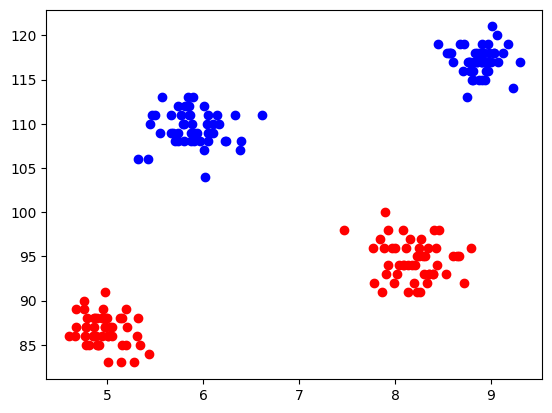

In [54]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# from kmeans import KMeans # Removed the import statement
import pandas as pd

# centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
# cluster_std = [1,1,1,1]

# X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)


#plt.scatter(X[:,0],X[:,1])

df = pd.read_csv('student_clustering.csv')

X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

# Steps....
1. Decide Clusters
2. Select Random centroids
3. Assign clusters
4. Move Centroids
5. Check Finish


In [45]:
import numpy as np
import random
class KMeans:
  def __init__(self,n_clusters = 2,max_iter = 100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):
    # Select random indices for initial centroids
    random_index = random.sample(range(0,X.shape[0]), self.n_clusters)
    self.centroids = X[random_index]

    for i in range(self.max_iter):
      # Assign clusters
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      # Move Centroids
      self.centroids = self.move_centroids(X,cluster_group)

      # Check Finish

      if (old_centroids == self.centroids).all():
        break
    return cluster_group

  def assign_clusters(self,X):
    cluster_group = []
    distances = []
    for row in X:
      for centroid in self.centroids:
        distance = np.sqrt(np.dot(row-centroid,row-centroid))
        distances.append(distance)
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      index_pos
      cluster_group.append(index_pos)
      distances.clear()
    return np.array(cluster_group)
  def move_centroids(self,X,cluster_group):
    new_centroids = []

    cluster_type = np.unique(cluster_group)
    for type in cluster_type:
      new_centroids = X[cluster_group == type].mean(axis = 0)
    return np.array(new_centroids)

In [46]:
a = np.array([1,2])
b = np.array([4,5])

In [47]:
Euclidian_dis = np.sqrt(np.dot(b-a,b-a))
print(Euclidian_dis)

4.242640687119285
